In [142]:
import pandas as pd
from labels import LABELS
import matplotlib.pyplot as plt
import numpy as np

In [143]:
data = "./dataset_resume.csv"
df = pd.read_csv(data, usecols=LABELS + ['description'])

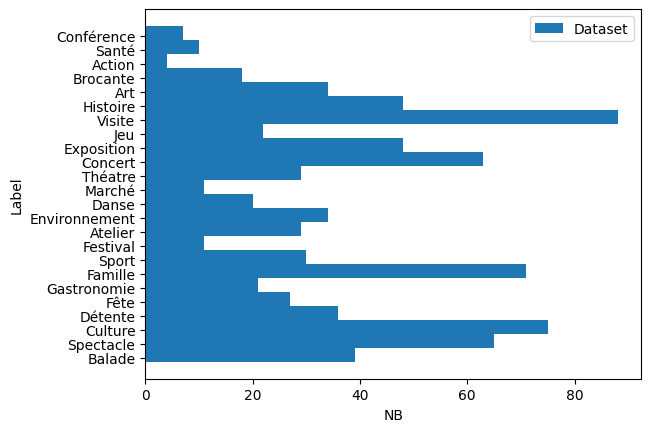

In [144]:
plt.barh(np.arange(len(LABELS)) + .2, df[LABELS].sum(), 1, label = 'Dataset')

plt.yticks(np.arange(len(LABELS)), LABELS)
plt.xlabel("NB")
plt.ylabel("Label")
plt.legend()
plt.show()

In [145]:
df[LABELS].sum().sort_values()

Action            4.0
Conférence        7.0
Santé            10.0
Marché           11.0
Festival         11.0
Brocante         18.0
Danse            20.0
Gastronomie      21.0
Jeu              22.0
Fête             27.0
Atelier          29.0
Théatre          29.0
Sport            30.0
Environnement    34.0
Art              34.0
Détente          36.0
Balade           39.0
Histoire         48.0
Exposition       48.0
Concert          63.0
Spectacle        65.0
Famille          71.0
Culture          75.0
Visite           88.0
dtype: float64

In [146]:
df.loc[df.Conférence == 1, 'description'].to_csv(path_or_buf='./augmentation/conf_source.csv', encoding='utf8')

In [147]:
conf = pd.read_csv('./augmentation/conference.csv')
df_new = df.copy()
for index, item in conf.iterrows():
    conf.loc[index, LABELS] = df_new.iloc[conf.iloc[index]['id']][LABELS]

    for i in range(1, 5):
        df_new_len = len(df_new.index)
        df_new.loc[df_new_len] = conf.loc[index, LABELS]
        df_new.loc[df_len, 'description'] = conf.loc[index, f'summary{i}']

#conf.drop(columns=['id'], inplace=True)

df_new.tail()

,description,Balade,Spectacle,Culture,Détente,Fête,Gastronomie,Famille,Sport,Festival,...,Concert,Exposition,Jeu,Visite,Histoire,Art,Brocante,Action,Santé,Conférence
412,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
413,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
414,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
415,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


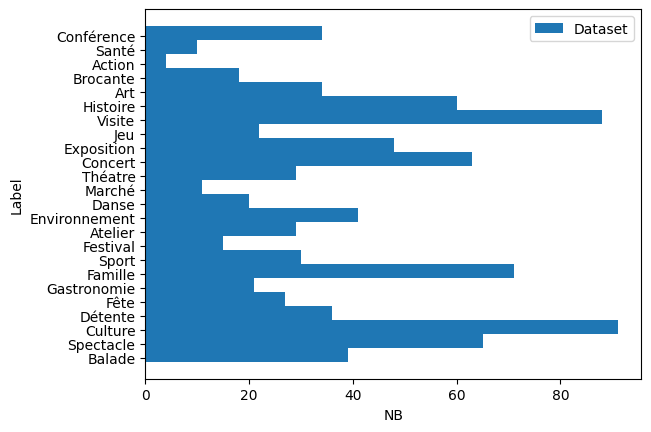

In [148]:
plt.barh(np.arange(len(LABELS)) + .2, df_new[LABELS].sum(), 1, label = 'Dataset')

plt.yticks(np.arange(len(LABELS)), LABELS)
plt.xlabel("NB")
plt.ylabel("Label")
plt.legend()
plt.show()

In [149]:
df_new[LABELS].sum().sort_values(), df[LABELS].sum().sort_values()

(Action            4.0
 Santé            10.0
 Marché           11.0
 Festival         15.0
 Brocante         18.0
 Danse            20.0
 Gastronomie      21.0
 Jeu              22.0
 Fête             27.0
 Atelier          29.0
 Théatre          29.0
 Sport            30.0
 Art              34.0
 Conférence       34.0
 Détente          36.0
 Balade           39.0
 Environnement    41.0
 Exposition       48.0
 Histoire         60.0
 Concert          63.0
 Spectacle        65.0
 Famille          71.0
 Visite           88.0
 Culture          91.0
 dtype: float64,
 Action            4.0
 Conférence        7.0
 Santé            10.0
 Marché           11.0
 Festival         11.0
 Brocante         18.0
 Danse            20.0
 Gastronomie      21.0
 Jeu              22.0
 Fête             27.0
 Atelier          29.0
 Théatre          29.0
 Sport            30.0
 Environnement    34.0
 Art              34.0
 Détente          36.0
 Balade           39.0
 Histoire         48.0
 Exposition      